<a href="https://colab.research.google.com/github/SabagYoav/Computer-vision/blob/main/CIFAR10_Image_classification_with_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Initial TensorFlow Import
import tensorflow as tf
import tensorflow_datasets
from tensorflow import keras

In [2]:
#Additional Imports
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#imports for vgg
from keras import layers
import keras.models as models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

In [5]:
#Load In The CIFAR Dataset
cifar10 = tf.keras.datasets.cifar10.load_data()

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0
y_train, y_test = y_train.flatten() , y_test.flatten()

print('x_train shape: ', x_train.shape, '\ny_train shape: ', y_train.shape,
      '\nx_test.shape: ', x_test.shape, '\ny_test shape: ', y_test.shape)

# calc and print number of classes
K = len(set(y_train))
print('Number of classes: ', K)

#calc and print shape of x_train tensor
print('x_train shape: ', x_train.shape)

x_train shape:  (50000, 32, 32, 3) 
y_train shape:  (50000,) 
x_test.shape:  (10000, 32, 32, 3) 
y_test shape:  (10000,)
Number of classes:  10
x_train shape:  (50000, 32, 32, 3)


In [7]:
#Load pretrained VGG model without top for fine tunning, using the functional API
vgg = VGG16(input_shape = (32,32,3), weights = 'imagenet', include_top = False)

#adjust the model layer to be untrainable because I want to train only the top layers
for layer in vgg.layers:
  layer.trainable = False

#add new layers to the custom model
custom_vgg = models.Sequential()
custom_vgg.add(vgg)
custom_vgg.add(layers.Flatten())
custom_vgg.add(layers.Dense(256, activation='relu'))
custom_vgg.add(layers.Dropout(0.5))
custom_vgg.add(layers.Dense(10, activation='softmax'))  # 10 classes in CIFAR-10

#print the model summary
custom_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:
#Model compilation
custom_vgg.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = 'accuracy')

#train, test categorical split
categorical_y_train = to_categorical(y_train, num_classes = 10)
categorical_y_test = to_categorical(y_test, num_classes = 10)

#Model Fit
history = custom_vgg.fit(x_train,categorical_y_train, epochs=10, validation_data=(x_test, categorical_y_test))

Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.4875 - accuracy: 0.4778 - val_loss: 1.2877 - val_accuracy: 0.5523
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3171 - accuracy: 0.5420 - val_loss: 1.2458 - val_accuracy: 0.5629
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2861 - accuracy: 0.5574 - val_loss: 1.2293 - val_accuracy: 0.5765
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2734 - accuracy: 0.5674 - val_loss: 1.2099 - val_accuracy: 0.5922
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2678 - accuracy: 0.5729 - val_loss: 1.2327 - val_accuracy: 0.5824
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2688 - accuracy: 0.5787 - val_loss: 1.2427 - val_accuracy: 0.5846
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2772 - accuracy: 0.5789 - val_loss: 1.2489 -

### Model evaluation

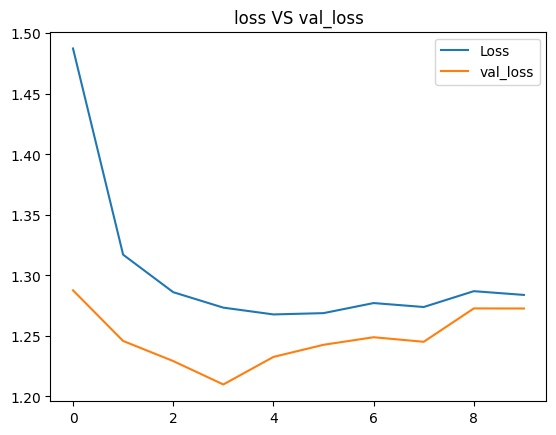

In [9]:
#plot loss per iteration
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('loss VS val_loss')
plt.legend()

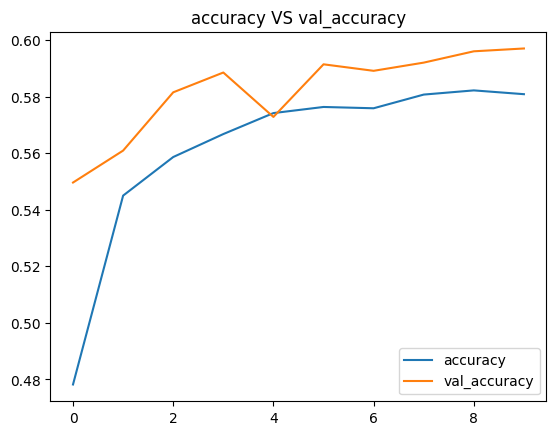

In [ ]:
#Plot the accuracy per eteration
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('accuracy VS val_accuracy')
plt.legend()

0.588 accuracy isn't the best expectation for the vgg model, lets compare it to some referrance

### Comparison model

In [11]:
#refference model from udemy

x = Flatten()(vgg.output)
prediction = Dense(10, activation = 'softmax')(x)
ref_vgg_udemy = Model(inputs = vgg.input, outputs = prediction)

ref_vgg_udemy.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [12]:
#ref model compilation
ref_vgg_udemy.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = 'accuracy')
#ref model fit
history_vgg_udemy = ref_vgg_udemy.fit(x_train,categorical_y_train, epochs=10, validation_data=(x_test,categorical_y_test))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5324 - accuracy: 0.4774 - val_loss: 1.3776 - val_accuracy: 0.5237
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3152 - accuracy: 0.5493 - val_loss: 1.3127 - val_accuracy: 0.5446
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2599 - accuracy: 0.5671 - val_loss: 1.2760 - val_accuracy: 0.5589
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2297 - accuracy: 0.5793 - val_loss: 1.2619 - val_accuracy: 0.5615
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2110 - accuracy: 0.5846 - val_loss: 1.2441 - val_accuracy: 0.5688
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1964 - accuracy: 0.5913 - val_loss: 1.2358 - val_accuracy: 0.5741
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1863 - accuracy: 0.5932 - val_loss: 1.2349 -

In [13]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#Prediction of cifar images classes
y_pred = ref_vgg_udemy.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 2s 7ms/step


### Ref model evaluation

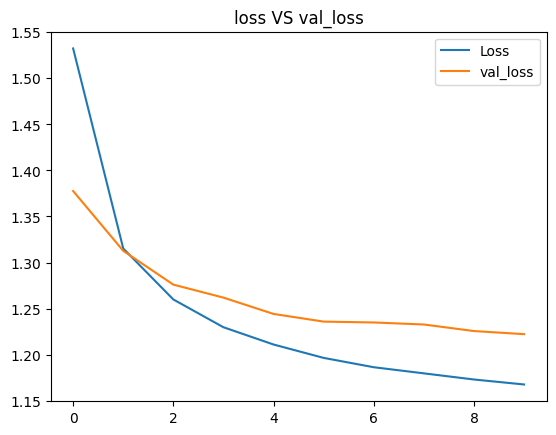

In [14]:
#plot loss per iteration
plt.plot(history_vgg_udemy.history['loss'], label = 'Loss')
plt.plot(history_vgg_udemy.history['val_loss'], label = 'val_loss')
plt.title('loss VS val_loss')
plt.legend()

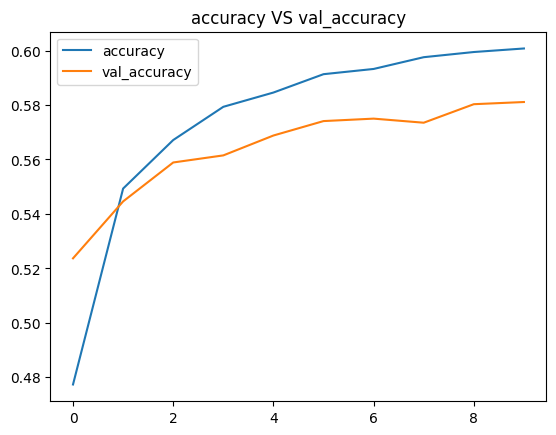

In [15]:
#plot the accuracy per iteration
plt.plot(history_vgg_udemy.history['accuracy'], label = 'accuracy')
plt.plot(history_vgg_udemy.history['val_accuracy'], label = 'val_accuracy')
plt.title('accuracy VS val_accuracy')
plt.legend()

From the refferance accuracy we implement that the 0.588 accuracy the base model achieved is not so bad

<Axes: >

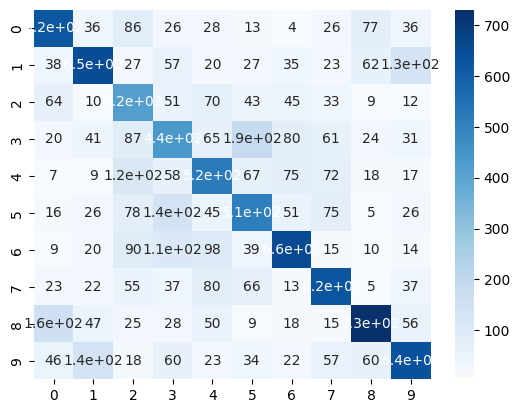

In [16]:
#CM visualisation
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(cm)
import seaborn as sns
sns.heatmap(cm, annot = True,cmap='Blues')

In [17]:
#Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: cat ; Prediction: bird')

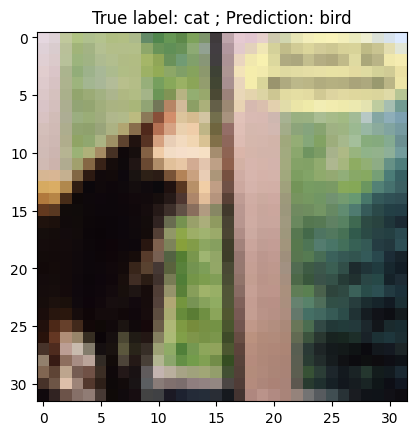

In [18]:
#show some misclassified example
mis_ind = np.where(y_pred != y_test)[0]
i = np.random.choice(mis_ind)
plt.imshow(x_test[i])
plt.title('True label: %s ; Prediction: %s'%( labels[y_test[i]], labels[y_pred[i]]))

In [19]:
mis_ind

array([   3,    7,    8, ..., 9993, 9995, 9998])